# Simulation for Library Acquisitions - printed books version.

In [1]:
import random
import numpy as np
import pandas as pd
import math

In [2]:
# Before getting total costs of books, to get labor costs for maintenance and cataloging.
# Accroding to ***, hourly labor cost can be calculated by annual wages, befefit rate, and paid bvacation hours.

def labor_costs(annual_work_hour):
    annual_wages = random.randint(50000, 70000)
    benefit_rate = random.uniform(0, 0.3)
    paid_off_hour = random.randint(0, 42)
    average_cost = (annual_wages + (annual_wages * benefit_rate)) / (annual_work_hour - paid_off_hour)
    return round(average_cost, 2)
labor_costs(1950)

38.6

In [3]:
## maintenance_cost can calculate from total_volume. 
def maintenance_cost(annual_work_hour, total_volume):
    maintenance_time = annual_work_hour * 0.04
    volumes_per_box = math.ceil(total_volume / 25)
    maintenance_cost = volumes_per_box * maintenance_time
    return round(maintenance_cost, 2)
maintenance_cost(1950, 350000)

1092000.0

In [4]:
# cataloging cost per book. Since we do not know how many book a library buy, we calculate cataloging labor cost per book. 
def cataloging_cost(annual_work_hour):
    day_cataloging = random.randint(8, 12)
    daily_labor = labor_costs(annual_work_hour) * 8
    cost_per_book = daily_labor / day_cataloging
    return round(cost_per_book, 2)
cataloging_cost(1950)

35.05

In [5]:
# get list of books including book price and thickness.
def get_book_list(num_of_titles, annual_work_hour):
    cost_per_book = cataloging_cost(annual_work_hour)
    pages = np.random.randint(10, 2000, size=num_of_titles)
    page_thickness = np.random.uniform(0.01, 0.05, size=num_of_titles)
    thickness = np.around(page_thickness * pages, decimals=2)
    page_price = np.random.uniform(0.01, 0.1, size=num_of_titles)
    price = np.around(page_price * pages, decimals=2)
    # Three types of demand indicates 3 is high, 2 medium, and 1 low.
    demand_list = ['1', '2', '3']
    demands = []
    for i in range(num_of_titles):
        demand = random.choice(demand_list)
        demands.append(demand)

    df = pd.DataFrame(data={'Thickness': thickness,
                            'Price': price,
                            'Demands': demands,
                            'cataloging_cost': cost_per_book})
    return df
plan = get_book_list(10000, 1950)
plan

,Thickness,Price,Demands,cataloging_cost
0,78.95,75.98,1,23.11
1,45.32,139.99,3,23.11
2,4.73,10.32,3,23.11
3,15.39,37.61,3,23.11
4,31.07,74.88,2,23.11
5,29.50,77.46,2,23.11
6,50.69,87.85,3,23.11
7,0.73,4.40,1,23.11
8,29.82,67.66,2,23.11
9,7.65,7.86,2,23.11


In [6]:
# vendor discount. We assume that vendor discount if a library purchase large volumes from them.
def vendor_discount(num_of_titles):
    if num_of_titles < 100:
        return 0.01
    elif 100 <= num_of_titles < 500:
        return 0.02
    elif num_of_titles >= 500:
        return 0.05

In [7]:
# Now we select from the list we created above.
# We consider both budget and thickness.
# We aggregate price and thickness separately, and we drop all nan value. 
# This is examples how it works.
plan = get_book_list(10000, 1950)
budget = 1000000 
space = 1000
select_plan = plan.copy(deep=True)
select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
print('This is total cost per book include book price itself and cataloging cost.\n\n', select_plan, '\n')
select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
print('Check price. \n\n', select_plan)
select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
print('Check thickness\n\n', select_plan)
acquisitions = select_plan.dropna()

This is total cost per book include book price itself and cataloging cost.

       Thickness   Price Demands  cataloging_cost  total_cost_per_book
0         42.79   52.55       1             33.0                85.55
1          7.72    3.93       2             33.0                36.93
2         21.64   64.41       2             33.0                97.41
3         11.29   32.48       1             33.0                65.48
4         19.57   27.69       1             33.0                60.69
5         32.53   72.70       3             33.0               105.70
6         69.16   50.71       2             33.0                83.71
7         60.96   48.61       3             33.0                81.61
8         13.37   31.06       1             33.0                64.06
9         21.39   45.41       1             33.0                78.41
10         4.31   38.29       2             33.0                71.29
11         1.43    6.03       1             33.0                39.03
12        22.

In [8]:
# From the above test, the code is re-written as a function. 
# return a dataFrame which is satisfied with both conditions (budget and thickness)

def select_book(plan, budget, space):
    select_plan = plan.copy(deep=True)
    select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
    select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
    select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
    acquisitions = select_plan.dropna()
    return acquisitions

select_book(plan, 1000000, 1000)

,Thickness,Price,Demands,cataloging_cost,total_cost_per_book,cost_accumulate,Total_thickness
0,42.79,52.55,1,33.0,85.55,85.55,42.79
1,7.72,3.93,2,33.0,36.93,122.48,50.51
2,21.64,64.41,2,33.0,97.41,219.89,72.15
3,11.29,32.48,1,33.0,65.48,285.37,83.44
4,19.57,27.69,1,33.0,60.69,346.06,103.01
5,32.53,72.70,3,33.0,105.70,451.76,135.54
6,69.16,50.71,2,33.0,83.71,535.47,204.70
7,60.96,48.61,3,33.0,81.61,617.08,265.66
8,13.37,31.06,1,33.0,64.06,681.14,279.03
9,21.39,45.41,1,33.0,78.41,759.55,300.42


In [9]:
# The simulation has two strateges.
# One is buying books based on users' demands.
# Second is buying books 
def MonteCarloSimulation(annual_work_hour, total_volume, budget, space, num_of_titles):
    acquisition_budget = budget - maintenance_cost(annual_work_hour, total_volume)


    plan = get_book_list(num_of_titles, annual_work_hour)


    demand_order = plan.sort_values(by='Demands', ascending=False)
    price_order = plan.sort_values(by='Price', ascending=True)

    demand_acquisition = select_book(demand_order, acquisition_budget, space)
    price_acquisition = select_book(price_order, acquisition_budget, space)

    demand_book = demand_acquisition['Price'].count()
    demand_cost = round(demand_acquisition['total_cost_per_book'].sum() * (1 - vendor_discount(demand_book)), 2)
    demand_thickness = math.ceil(demand_acquisition['Thickness'].sum())

    price_book = price_acquisition['Price'].count()
    price_cost = round(price_acquisition['total_cost_per_book'].sum() * 1 - vendor_discount(price_book), 2)
    price_thickness = math.ceil(price_acquisition['Thickness'].sum())

    sim_data = [demand_book, demand_cost, demand_thickness, price_book, price_cost, price_thickness]

    return sim_data
MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)

[328, 27440.24, 9983, 4200, 127833.76, 9994]

In [10]:
# Simulation for 100 times and return Data Frame.
if __name__ == '__main__':


    datas = []
    for i in range(100):
        data = MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)
        datas.append(data)
    simulation_result = pd.DataFrame(datas, columns=['num_of_books_by_demand',
                                                     'total_cost_by_demand',
                                                     'total_thickness_by_demand',
                                                     'num_of_books_by_price',
                                                     'total_cost_by_price',
                                                     'total_thickness_by_price'])
simulation_result

,num_of_books_by_demand,total_cost_by_demand,total_thickness_by_demand,num_of_books_by_price,total_cost_by_price,total_thickness_by_price
0,330,26557.90,9988,4205,115885.11,9999
1,327,25100.42,9993,4260,94974.98,9996
2,332,28703.85,9987,4280,139981.73,10000
3,355,25444.06,9986,4233,104825.28,9997
4,321,29369.49,9933,4245,158801.00,9997
5,323,27694.73,9969,4184,136630.25,9999
6,326,24675.80,9982,4221,102972.11,10000
7,344,29433.34,9973,4202,147190.85,9997
8,347,32284.78,9993,4193,174390.13,9997
9,326,25998.88,9984,4201,120148.05,10000


No handles with labels found to put in legend.


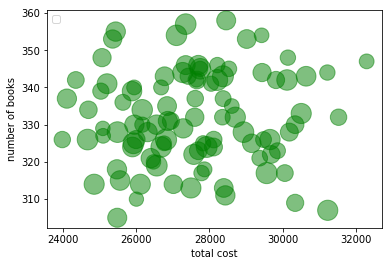

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = simulation_result['total_cost_by_demand']
y = simulation_result['num_of_books_by_demand']

s = np.random.rand(*x.shape) * 1000 + 800

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


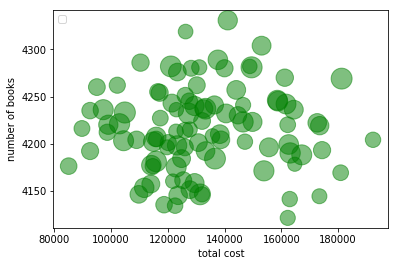

In [15]:
x = simulation_result['total_cost_by_price']
y = simulation_result['num_of_books_by_price']

s = np.random.rand(*x.shape) * 1000 + 800

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")
plt.legend(loc='upper left')
plt.show()